In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

origin_data = pd.read_csv("./data/train.csv")
# Explore the whole dataset 
origin_data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krithman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0005019281,ADZPIG9QOCDG5,0,0,4.0,1203984000,good version of a classic,This is a charming version of the classic Dick...
1,1,0005019281,A35947ZP82G7JH,0,0,3.0,1388361600,Good but not as moving,It was good but not as emotionally moving as t...
2,2,0005019281,A3UORV8A9D5L2E,0,0,3.0,1388361600,Winkler's Performance was ok at best!,"Don't get me wrong, Winkler is a wonderful cha..."
3,3,0005019281,A1VKW06X1O2X7V,0,0,5.0,1202860800,It's an enjoyable twist on the classic story,Henry Winkler is very good in this twist on th...
4,4,0005019281,A3R27T4HADWFFJ,0,0,4.0,1387670400,Best Scrooge yet,This is one of the best Scrooge movies out. H...


In [22]:
origin_data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,1.697533e+06,1.697533e+06,1.697533e+06,1.397533e+06,1.697533e+06
mean,8.487660e+05,3.569048e+00,5.301422e+00,4.111468e+00,1.262422e+09
std,4.900357e+05,1.727883e+01,2.024445e+01,1.196808e+00,1.289277e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.793792e+08
25%,4.243830e+05,0.000000e+00,0.000000e+00,4.000000e+00,1.164413e+09
50%,8.487660e+05,1.000000e+00,1.000000e+00,5.000000e+00,1.307491e+09
75%,1.273149e+06,3.000000e+00,5.000000e+00,5.000000e+00,1.373242e+09
max,1.697532e+06,6.084000e+03,6.510000e+03,5.000000e+00,1.406074e+09


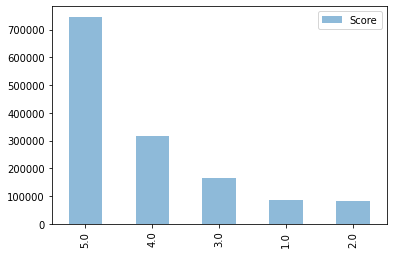

In [23]:
origin_data['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

It is obvious that the 5 star reviews outweigh in numbers all the other reviews from 1 to 4.

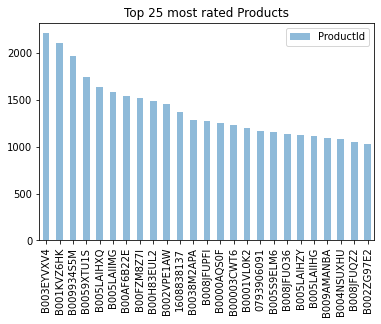

In [24]:
origin_data['ProductId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 most rated Products")
plt.show()

The productIds are not unique. Some of them are used over 2000 times!

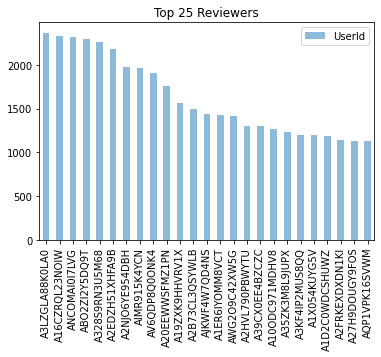

In [25]:
origin_data['UserId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 Reviewers")
plt.show()

The userIds are also not unique. Some of them are used over 2000 times!

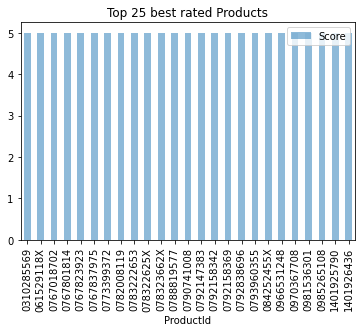

In [26]:
origin_data[['Score','ProductId']].groupby('ProductId').mean().nlargest(25,'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 best rated Products")
plt.show()

Multiple products have been reviewed with the maximum review score.

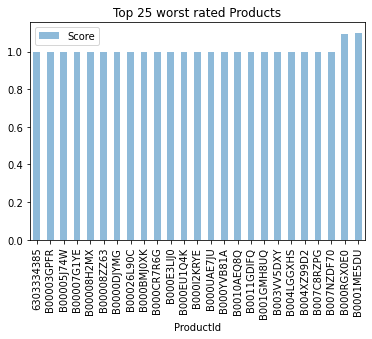

In [27]:
origin_data[['Score','ProductId']].groupby('ProductId').mean().nsmallest(25,'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 worst rated Products")
plt.show()

Less than 25 products have been reviewed with the least possible score 1.

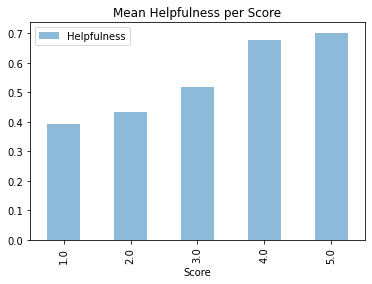

In [36]:
origin_data['Helpfulness'] = origin_data['HelpfulnessNumerator'] / origin_data['HelpfulnessDenominator']
origin_data[['Score', 'Helpfulness']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness per Score")
plt.show()

It seems that the most influential data column that can affect the score is the reviews that the reviewers make, and their helpfulness factor. Since if an individual were to make a positive review but the helpfulness factor is low, then the movie can still receive a low score. On the contrary, if the user were to review the movie highly and the helpfulness factor is also high, then the movie is expected to be reviewed positively.

In [17]:
import nltk

origin_data['Text'].loc[origin_data['Text'].isnull()] = ''
origin_data['Summary'].loc[origin_data['Summary'].isnull()] = ''

def count_words(sentence):
    return len(nltk.word_tokenize(sentence))

origin_data['SummaryLength'] = origin_data['Summary'].apply(count_words)
origin_data['TextLength'] = origin_data['Text'].apply(count_words)
origin_data.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,SummaryLength,TextLength
0,0,0005019281,ADZPIG9QOCDG5,0,0,4.0,1203984000,good version of a classic,This is a charming version of the classic Dick...,5,62
1,1,0005019281,A35947ZP82G7JH,0,0,3.0,1388361600,Good but not as moving,It was good but not as emotionally moving as t...,5,23
2,2,0005019281,A3UORV8A9D5L2E,0,0,3.0,1388361600,Winkler's Performance was ok at best!,"Don't get me wrong, Winkler is a wonderful cha...",8,63
3,3,0005019281,A1VKW06X1O2X7V,0,0,5.0,1202860800,It's an enjoyable twist on the classic story,Henry Winkler is very good in this twist on th...,9,34
4,4,0005019281,A3R27T4HADWFFJ,0,0,4.0,1387670400,Best Scrooge yet,This is one of the best Scrooge movies out. H...,3,29


Text(0.5, 1.0, 'Mean Summary Length per Score')

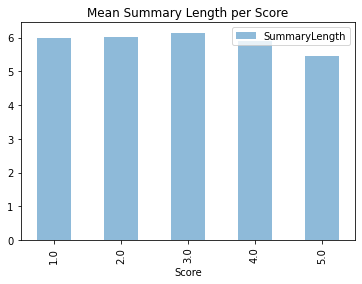

In [18]:
origin_data[['Score','SummaryLength']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title('Mean Summary Length per Score')

Text(0.5, 1.0, 'Mean Text Length per Score')

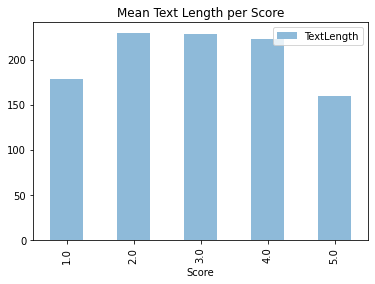

In [19]:
origin_data[['Score','TextLength']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title('Mean Text Length per Score')

It is obvious that the mean text and summary length concists of large enough documents to build a corpus with TFIDF vectorizer to express both columns.

Top 100 words for Score =  1
['!', ',', '.', 'movie', '?', '...', "n't", 'bad', "'s", 'worst', 'boring', 'waste', 'time', 'film', 'ever', "''", '``', 'good', 'terrible', 'horrible', 'awful', '-', 'dvd', 'like', 'money', '....', '&', ':', 'really', 'great', 'star', 'stars', 'movies', 'stupid', ';', 'could', 'watch', 'get', '(', 'poor', 'even', ')', 'made', 'seen', 'another', 'garbage', 'buy', '*', 'disappointing', "'ve", 'worth', 'better', 'show', 'review', 'funny', 'much', '1', 'version', 'would', 'please', 'crap', 'story', 'quality', 'horror', 'give', 'way', 'love', 'oh', 'series', 'make', 'nothing', 'disappointment', '--', 'never', 'big', "'", 'worse', 'lame', 'zero', '..', '.....', 'disappointed', 'quot', '2', 'acting', 'watching', 'sucks', 'save', 'see', 'dumb', 'trash', 'original', 'back', 'blu-ray', 'people', 'first', 'real', 'best', 'season', 'beware']

Top 100 words for Score =  2
[',', '.', '!', '...', 'movie', '?', "'s", 'good', "n't", 'bad', 'film', '``', "''", 'great', 'bor

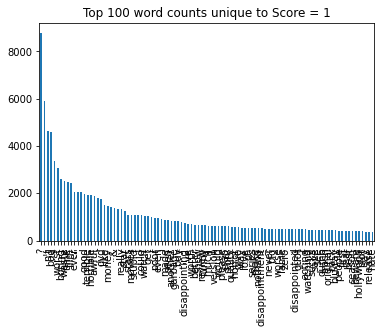

Top 100 words sort of unique to Score =  2
['...', '?', "'s", 'good', "n't", 'bad', 'film', '``', "''", 'boring', 'disappointing', 'better', 'like', '-', 'much', '&', '....', ';', 'story', ':', 'stars', 'dvd', 'time', 'really', 'could', 'poor', '(', ')', 'best', '2', 'ok', 'funny', 'another', 'watch', 'waste', 'review', 'get', 'worth', 'worst', 'two', 'nothing', 'plot', 'little', 'disappointed', "'", 'love', 'first', 'acting', 'slow', 'disappointment', 'quot', 'way', 'series', 'pretty', 'terrible', 'original', 'interesting', 'well', 'movies', 'quality', 'big', 'show', 'money', 'comedy', 'would', '--', 'book', 'even', 'weak', 'horror', '*', 'dull', 'version', 'action', 'long', 'expected', '..', 'enough', '.....', 'see', "'ve", 'stupid', 'make', 'old', 'predictable', 'lame', 'okay', 'overrated', 'made', 'star', 'mediocre', 'still', 'fun', 'horrible', 'oh', 'season', 'seen', 'special', 'ever', 'awful']



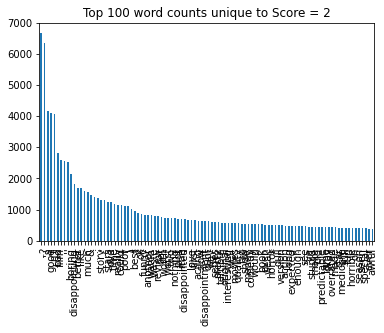

Top 100 words sort of unique to Score =  3
['good', '...', "'s", '?', 'film', "''", '``', 'bad', "n't", 'ok', 'better', 'fun', '-', 'story', '&', 'okay', 'stars', ';', 'dvd', 'like', ':', 'best', 'interesting', 'much', 'could', 'entertaining', '(', ')', 'funny', 'little', '....', 'decent', 'still', 'worth', 'first', 'review', 'love', 'pretty', 'watch', 'action', 'really', '3', 'time', 'comedy', 'well', 'series', 'average', 'classic', "'", 'season', 'show', 'disappointing', 'flick', 'expected', 'nice', 'quot', 'original', 'horror', '2', '--', 'bit', 'nothing', 'movies', 'another', 'acting', 'get', 'plot', 'would', 'old', 'cute', 'three', 'slow', '*', 'enough', 'book', 'version', 'quality', 'enjoyable', 'new', '..', 'see', 'poor', 'way', 'fans', 'special', 'star', 'quite', 'blu-ray', 'thriller', 'long', 'two', 'ending', 'watching', '.....', 'mediocre', "'ve", 'predictable', 'kids', 'different', 'say']



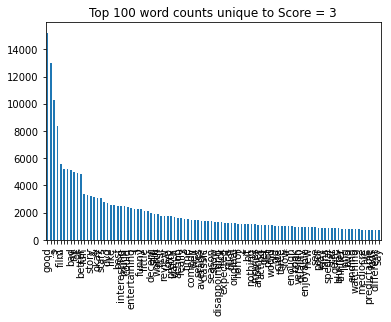

Top 100 words sort of unique to Score =  4
['good', '...', "'s", 'film', "''", '``', '?', 'fun', 'better', 'story', '&', 'best', 'classic', '-', 'funny', "n't", 'dvd', 'love', ':', ';', 'like', ')', 'entertaining', '(', 'still', 'series', 'stars', 'action', 'bad', 'show', 'well', 'excellent', 'interesting', 'season', 'time', 'worth', 'comedy', 'pretty', 'nice', '....', 'review', 'enjoyable', 'first', 'little', 'really', 'watch', 'family', 'flick', 'horror', 'movies', 'another', "'", 'thriller', 'quot', 'old', 'much', 'cute', 'new', 'life', 'original', 'drama', '--', 'see', 'liked', 'done', '2', 'get', 'back', 'blu-ray', '4', 'could', 'solid', 'expected', 'star', 'two', 'version', 'way', 'different', '*', '3', 'wonderful', 'set', 'surprisingly', 'collection', 'fans', 'four', 'acting', 'book', 'real', 'decent', 'true', 'beautiful', 'dark', 'look', 'would', 'watching', 'ever', 'films', '..', 'kids']



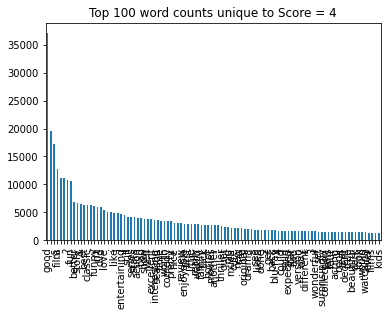

Top 100 words sort of unique to Score =  5
['!', 'great', 'movie', ',', '.', 'best', 'love', 'film', 'classic', '?', 'dvd', '``', "''", 'series', 'excellent', 'show', 'season', '&', 'ever', '-', 'fun', 'story', "n't", 'funny', 'awesome', 'time', ':', 'movies', 'wonderful', ')', 'better', ';', 'favorite', '(', 'stars', 'must', 'like', 'loved', 'another', 'family', 'amazing', 'see', 'comedy', 'still', 'watch', '....', 'tv', 'fantastic', 'collection', 'well', 'review', 'action', 'first', 'really', 'five', 'beautiful', 'get', '2', 'old', 'masterpiece', 'set', 'life', 'true', 'new', 'made', 'films', 'quot', "'", 'christmas', 'worth', '*', 'blu-ray', 'brilliant', 'horror', 'wow', 'perfect', '--', 'entertaining', 'greatest', 'finally', 'back', 'hilarious', 'fan', 'never', 'star', 'real', 'seen', '5', 'way', 'original', 'drama', '1', 'version', 'buy', 'two', 'outstanding', 'much', 'done', '3', 'little']



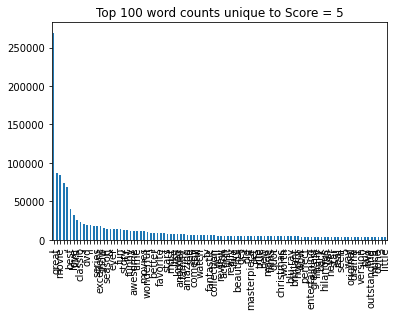

In [37]:
topWords = []
for i in range(1,6):
    words = pd.Series(word_tokenize(' '.join(origin_data.where(origin_data['Score'] == float(i))['Summary'].dropna()).lower())).value_counts()
    topWordsForScore = words.where(~words.index.isin(stopwords.words()))
    print("Top 100 words for Score = ", i)
    print(topWordsForScore.nlargest(100).index.tolist())
    print()
    topWords.append(topWordsForScore)

for i in range(len(topWords)):
    fig, ax = plt.subplots()
    allExcepti = topWords[:i] + topWords[i+1:]
    flattened = pd.concat(allExcepti)
    topWords[i] = topWords[i].where(~topWords[i].index.isin(flattened.nlargest( ).index.tolist()))
    print("Top 100 words sort of unique to Score = ", i+1)
    print(topWords[i].nlargest(100).index.tolist())
    print()
    topWords[i].nlargest(100).plot(kind='bar', ax=ax)
    plt.title("Top 100 word counts unique to Score = " + str(i+1))
    plt.show()